In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Preprocessing Data

In [3]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df_1 = df.dropna()
df_1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
number = LabelEncoder()
df_1['gender'] = number.fit_transform(df_1['gender'])
df_1['ever_married'] = number.fit_transform(df_1['ever_married'])
df_1['work_type'] = number.fit_transform(df_1['work_type'])
df_1['Residence_type'] = number.fit_transform(df_1['Residence_type'])
df_1['smoking_status'] = number.fit_transform(df_1['smoking_status'])

C:\Users\asus\AppData\Local\Temp/ipykernel_13912/1938741493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['gender'] = number.fit_transform(df_1['gender'])
C:\Users\asus\AppData\Local\Temp/ipykernel_13912/1938741493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ever_married'] = number.fit_transform(df_1['ever_married'])
C:\Users\asus\AppData\Local\Temp/ipykernel_13912/1938741493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [6]:
X = df_1.iloc[:,1:10]
y = df_1['stroke']

# Split Dataset

In [7]:
 from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3436, 9)
(1473, 9)
(3436,)
(1473,)


In [10]:
y_train[y_train==1].size

146

In [11]:
y_train[y_train==0].size

3290

In [12]:
y_test[y_test==1].size

63

In [13]:
y_test[y_test==0].size

1410

# Naive Bayes

In [14]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [15]:
nb.score(X_train, y_train)

0.8664144353899884

In [16]:
nb.score(X_test, y_test)

0.8906992532247114

In [17]:
y_pred = nb.predict(X_test)

In [18]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

# Evaluation

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
print(confusion_matrix(y_test, y_pred))

[[1285  125]
 [  36   27]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1410
           1       0.18      0.43      0.25        63

    accuracy                           0.89      1473
   macro avg       0.58      0.67      0.60      1473
weighted avg       0.94      0.89      0.91      1473



# Visualisasi Hasil

In [22]:
from jcopml.plot import plot_confusion_matrix

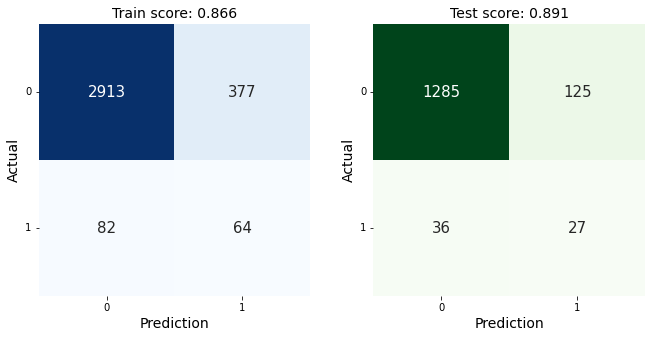

In [23]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, nb)